In [1]:
from movie_preprocessing import video_crop_threshold_ui
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
state = video_crop_threshold_ui()

In [3]:
frames = state['frames_modificado']

### PCA analysis

In [4]:
X = frames.reshape(frames.shape[0],frames.shape[1]*frames.shape[2]).T
X_mean = np.mean(X,axis=1,keepdims=True)
X_fluc = X-X_mean
np.shape(X)

(420000, 307)

In [148]:
U, s, Vh = np.linalg.svd(X_fluc, full_matrices=False)

Text(0.5, 1.0, 'Cumulative sum')

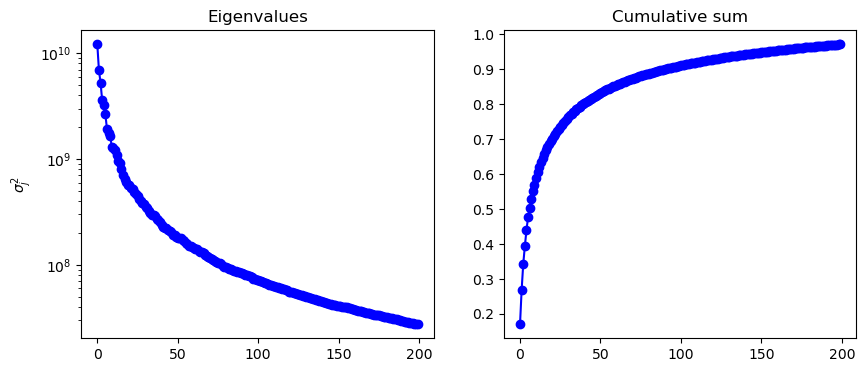

In [35]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))  # 1 row, 2 columns
# Left plot
axes[0].plot(np.arange(0,200),s[:200]**2,'bo-')
axes[0].set_title("Eigenvalues")
axes[0].set_ylabel("$\\sigma_j^2$")
axes[0].set_yscale('log')

# Right plot
axes[1].plot(np.arange(0,200),np.cumsum(s[:200]**2)/np.sum(s**2),'bo-')
axes[1].set_title("Cumulative sum")

Variance explained by first 9 modes: 55.19%


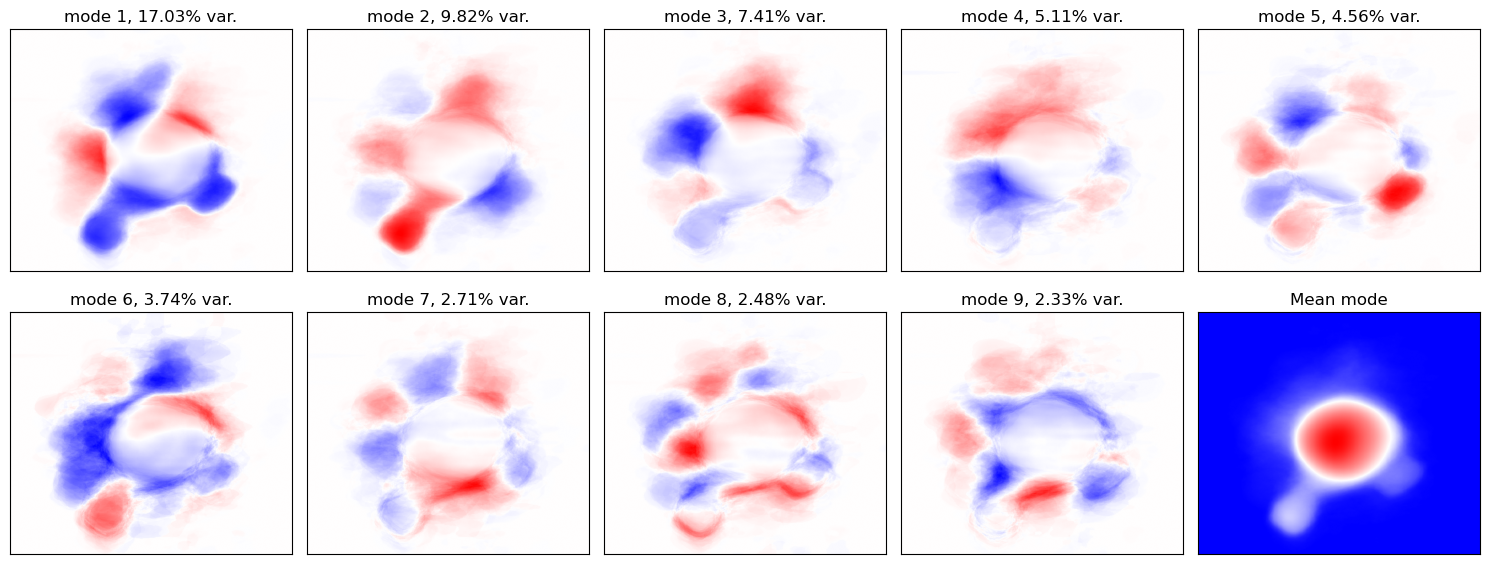

In [272]:
#multiple modes plotted with the X_mean considered
print('Variance explained by first 9 modes: {:.2f}%'.format(np.sum((s[:9]**2)/np.sum(s**2))*100))
fig, axes = plt.subplots(2, 5, figsize=(15, 6))  # 2 rows, 5 columns
modes_to_plot = [0, 1, 2, 3, 4, 5,6,7,8,9, -1]  # Last one is mean mode
for i, mode in enumerate(modes_to_plot):
    if i+1 == len(modes_to_plot):
        ax = axes[(i - 1) // 5, (i - 1) % 5]
        im = ax.imshow(X_mean.reshape(frames.shape[1], frames.shape[2]), cmap='bwr')
        ax.set_xticks([]); ax.set_yticks([])
        ax.set_title(f"Mean mode")
        break
    ax = axes[i // 5, i % 5]
    max_val = np.max(np.abs(U[:, mode]))
    im = ax.imshow(U[:, mode].reshape(frames.shape[1], frames.shape[2]), cmap='bwr', vmin=-max_val, vmax=max_val)
    ax.set_xticks([]); ax.set_yticks([])
    variance_explained = (s[mode]**2) / np.sum(s**2) * 100
    ax.set_title(f"mode {mode + 1}, {variance_explained:.2f}% var.")
plt.tight_layout()
plt.savefig('PCAmodes_variance.svg')
plt.show()

In [153]:
r = 150
print('Variance explained by first {:.0f} modes: {:.2f}%'.format(r, np.sum((s[:r]**2)/np.sum(s**2))*100))

Variance explained by first 150 modes: 94.82%


### TICA

In [4]:
X = frames.reshape(frames.shape[0],frames.shape[1]*frames.shape[2]).T
X_mean = np.mean(X,axis=1,keepdims=True)
X_fluc = X-X_mean
np.shape(X)
Xf = X_fluc.astype(np.float64)

lower dimensionality

In [5]:
U, s, Vh = np.linalg.svd(Xf, full_matrices=False)

In [6]:
r = 20
print('Variance explained by first {:.0f} modes: {:.2f}%'.format(r, np.sum((s[:r]**2)/np.sum(s**2))*100))
Xf_low = U[:, :r].T @ Xf
Xf_low.shape


Variance explained by first 20 modes: 69.37%


(20, 307)

In [7]:
import pyemma.coordinates as coor

taus = [1,5,10,15,20,25]
n_modes = 2

for tau_i in taus:

    vamp = coor.vamp(Xf_low.T, lag=tau_i, dim=n_modes)
    score = vamp.score(score_method='VAMP2')
    print(f'tau={tau_i}, score={score:.5f}, nmodes={n_modes}')

tau=1, score=2.58726, nmodes=2
tau=5, score=2.39154, nmodes=2
tau=10, score=2.29684, nmodes=2
tau=15, score=2.32133, nmodes=2
tau=20, score=2.35622, nmodes=2
tau=25, score=2.40772, nmodes=2


/home/ian/miniconda3/envs/pyemma/lib/python3.10/site-packages/decorator.py:235: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /home/ian/miniconda3/envs/pyemma/lib/python3.10/site-packages/decorator.py line 235. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/home/ian/miniconda3/envs/pyemma/lib/python3.10/site-packages/decorator.py:235: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /home/ian/miniconda3/envs/pyemma/lib/python3.10/site-packages/decorator.py line 235. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/home/ian/miniconda3/envs/pyemma/lib/python3.10/site-packages/decorator.py:235: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /home/ian/miniconda3/envs/pyemma/lib/python3.10/site-packages/decorator.py line 235. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/home/ian/miniconda

/home/ian/miniconda3/envs/pyemma/lib/python3.10/site-packages/decorator.py:235: PyEMMA_DeprecationWarning: Call to deprecated function "tica". Called from /home/ian/miniconda3/envs/pyemma/lib/python3.10/site-packages/decorator.py line 235. Use deeptime.decomposition.TICA instead.
  return caller(func, *(extras + args), **kw)
/home/ian/miniconda3/envs/pyemma/lib/python3.10/site-packages/decorator.py:235: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /home/ian/miniconda3/envs/pyemma/lib/python3.10/site-packages/decorator.py line 235. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
/home/ian/miniconda3/envs/pyemma/lib/python3.10/site-packages/decorator.py:235: PyEMMA_DeprecationWarning: Call to deprecated function "tica". Called from /home/ian/miniconda3/envs/pyemma/lib/python3.10/site-packages/decorator.py line 235. Use deeptime.decomposition.TICA instead.
  return caller(func, *(extras + args), **kw)
/home/ian/miniconda

tau=1, score=2.58726, nmodes=2
tau=5, score=2.39154, nmodes=2
tau=10, score=2.29684, nmodes=2
tau=15, score=2.32133, nmodes=2
tau=20, score=2.35622, nmodes=2
tau=25, score=2.40772, nmodes=2


/home/ian/miniconda3/envs/pyemma/lib/python3.10/site-packages/decorator.py:235: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /home/ian/miniconda3/envs/pyemma/lib/python3.10/site-packages/decorator.py line 235. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)


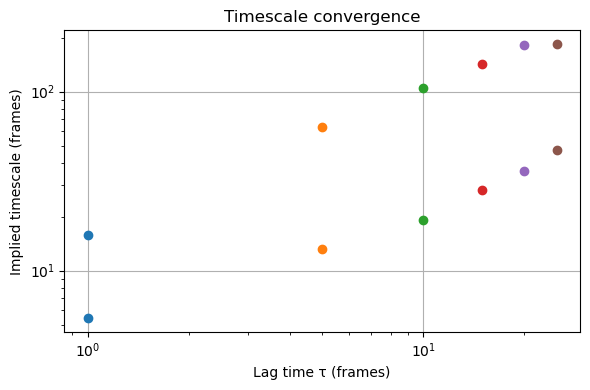

In [8]:
import pyemma.coordinates as coor

taus = [1,5,10,15,20,25]

n_modes = 2

plt.figure(figsize=(6,4))

for tau_i in taus:
    tica_i = coor.tica(Xf_low.T, lag=tau_i, dim=n_modes)
    ts_i = tica_i.timescales[:n_modes]
    plt.plot([tau_i]*n_modes, ts_i, 'o')

    vamp = coor.vamp(Xf_low.T, lag=tau_i, dim=n_modes)
    score = vamp.score(score_method='VAMP2')
    print(f'tau={tau_i}, score={score:.5f}, nmodes={n_modes}')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Lag time τ (frames)')
plt.ylabel('Implied timescale (frames)')
plt.title('Timescale convergence')
plt.grid(True)
plt.tight_layout()
plt.show()

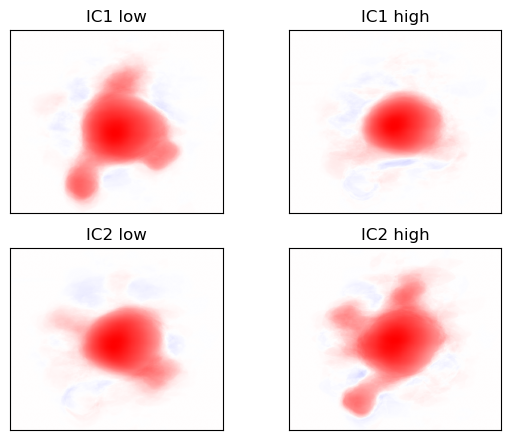

In [ ]:
tica = coor.tica(Xf_low.T, lag=20, dim=2)
Y = tica.get_output()[0]   # shape: (n_frames, 2)

IC1 = Y[:, 0]
IC2 = Y[:, 1]
fig, ax = plt.subplots(2, 2, figsize=(4*1.5, 3*1.5))
#plot IC2 frame and IC1 frame in the same plot
for idx, IC in enumerate([IC1, IC2]):
    low_idx  = np.where(IC < np.percentile(IC, 5))[0]
    high_idx = np.where(IC > np.percentile(IC, 95))[0]
    i_low  = low_idx[len(low_idx)//2]
    i_high = high_idx[len(high_idx)//2]
    X_low  = U[:, :r] @ Xf_low[:, i_low]  + X_mean[:, 0]
    X_high = U[:, :r] @ Xf_low[:, i_high] + X_mean[:, 0]
    frame_low  = X_low.reshape(frames.shape[1], frames.shape[2])
    frame_high = X_high.reshape(frames.shape[1], frames.shape[2])
    max_val = np.max(np.abs(frame_low))
    ax[idx, 0].imshow(frame_low, cmap="bwr", vmin=-max_val, vmax=max_val)
    ax[idx, 0].set_title(f"IC{idx+1} low")
    max_val = np.max(np.abs(frame_high))
    ax[idx, 1].imshow(frame_high, cmap="bwr", vmin=-max_val, vmax=max_val)
    ax[idx, 1].set_title(f"IC{idx+1} high")
    #remove axis
    ax[idx, 0].set_xticks([]); ax[idx, 0].set_yticks([])
    ax[idx, 1].set_xticks([]); ax[idx, 1].set_yticks([])
    # for a in ax: a.axis("off")
plt.tight_layout()
plt.savefig('TICA_IC1_IC2_frames.svg')
plt.show()



### DMD

In [4]:
X = frames.reshape(frames.shape[0],frames.shape[1]*frames.shape[2]).T
X_mean = np.mean(X,axis=1,keepdims=True)
X_fluc = X-X_mean
np.shape(X)

(420000, 307)

In [5]:
from pydmd import DMD, BOPDMD, EDMD
from pydmd.plotter import plot_summary
%matplotlib inline
rank=20
optdmd = BOPDMD(svd_rank=rank)
optdmd.fit(X_fluc,np.linspace(0,frames.shape[0]-1,frames.shape[0]))

/home/ian/miniconda3/envs/pyemma/lib/python3.10/site-packages/pydmd/snapshots.py:73: UserWarning: Input data condition number 2344323220094239.0. Consider preprocessing data, passing in augmented data
matrix, or regularization methods.
  warnings.warn(
/home/ian/miniconda3/envs/pyemma/lib/python3.10/site-packages/pydmd/bopdmd.py:973: UserWarning: Initial trial of Optimized DMD failed to converge. Consider re-adjusting your variable projection parameters with the varpro_opts_dict and consider setting verbose=True.
  warnings.warn(msg)


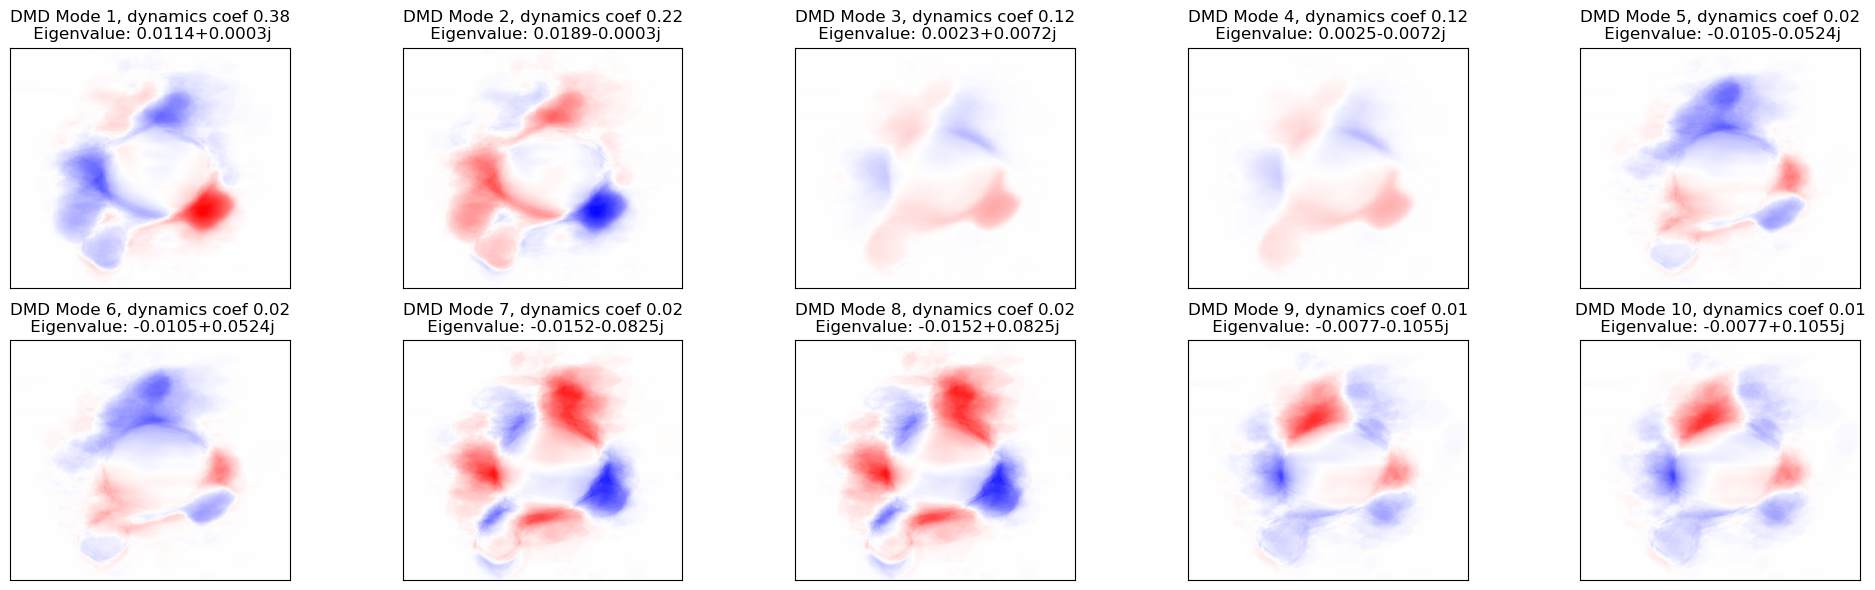

In [9]:
#Select higher amplitude dmd modes  
r_modes = 10
dmd_dynamics_l2 = np.linalg.norm(optdmd.dynamics, axis=1)
max_dynamics_indices = np.argsort(dmd_dynamics_l2)[-r_modes:][::-1]
top_indices = max_dynamics_indices[:r_modes]  # Indices of the top 5 modes
#Plot modes and amplitude evolution in the same figure
fig, axes = plt.subplots(2, 5, figsize=(20, 6))  # 2 rows, 5 columns
for i, idx in enumerate(top_indices):
    mode_shape = optdmd.modes[:, idx].reshape(frames.shape[1], frames.shape[2])
    max_val = np.max(np.abs(mode_shape))
    # amplitude_evolution = optdmd.amplitudes[idx] * np.exp(optdmd.eigs[idx] * np.linspace(0, frames.shape[0]-1, frames.shape[0]))
    dynamics = np.linalg.norm(optdmd.dynamics[idx,:]) / np.sum(np.linalg.norm(optdmd.dynamics, axis=1))
    ax = axes[i // 5, i % 5]
    im = ax.imshow(np.real(mode_shape), cmap='bwr', vmin=-max_val, vmax=max_val)
    ax.set_xticks([]); ax.set_yticks([])
    ax.set_title(f"DMD Mode {i+1}, dynamics coef {dynamics:.2f}\n Eigenvalue: {optdmd.eigs[idx]:.4f}")
plt.tight_layout()
plt.savefig('DMD_top_modes_dynamics.svg')

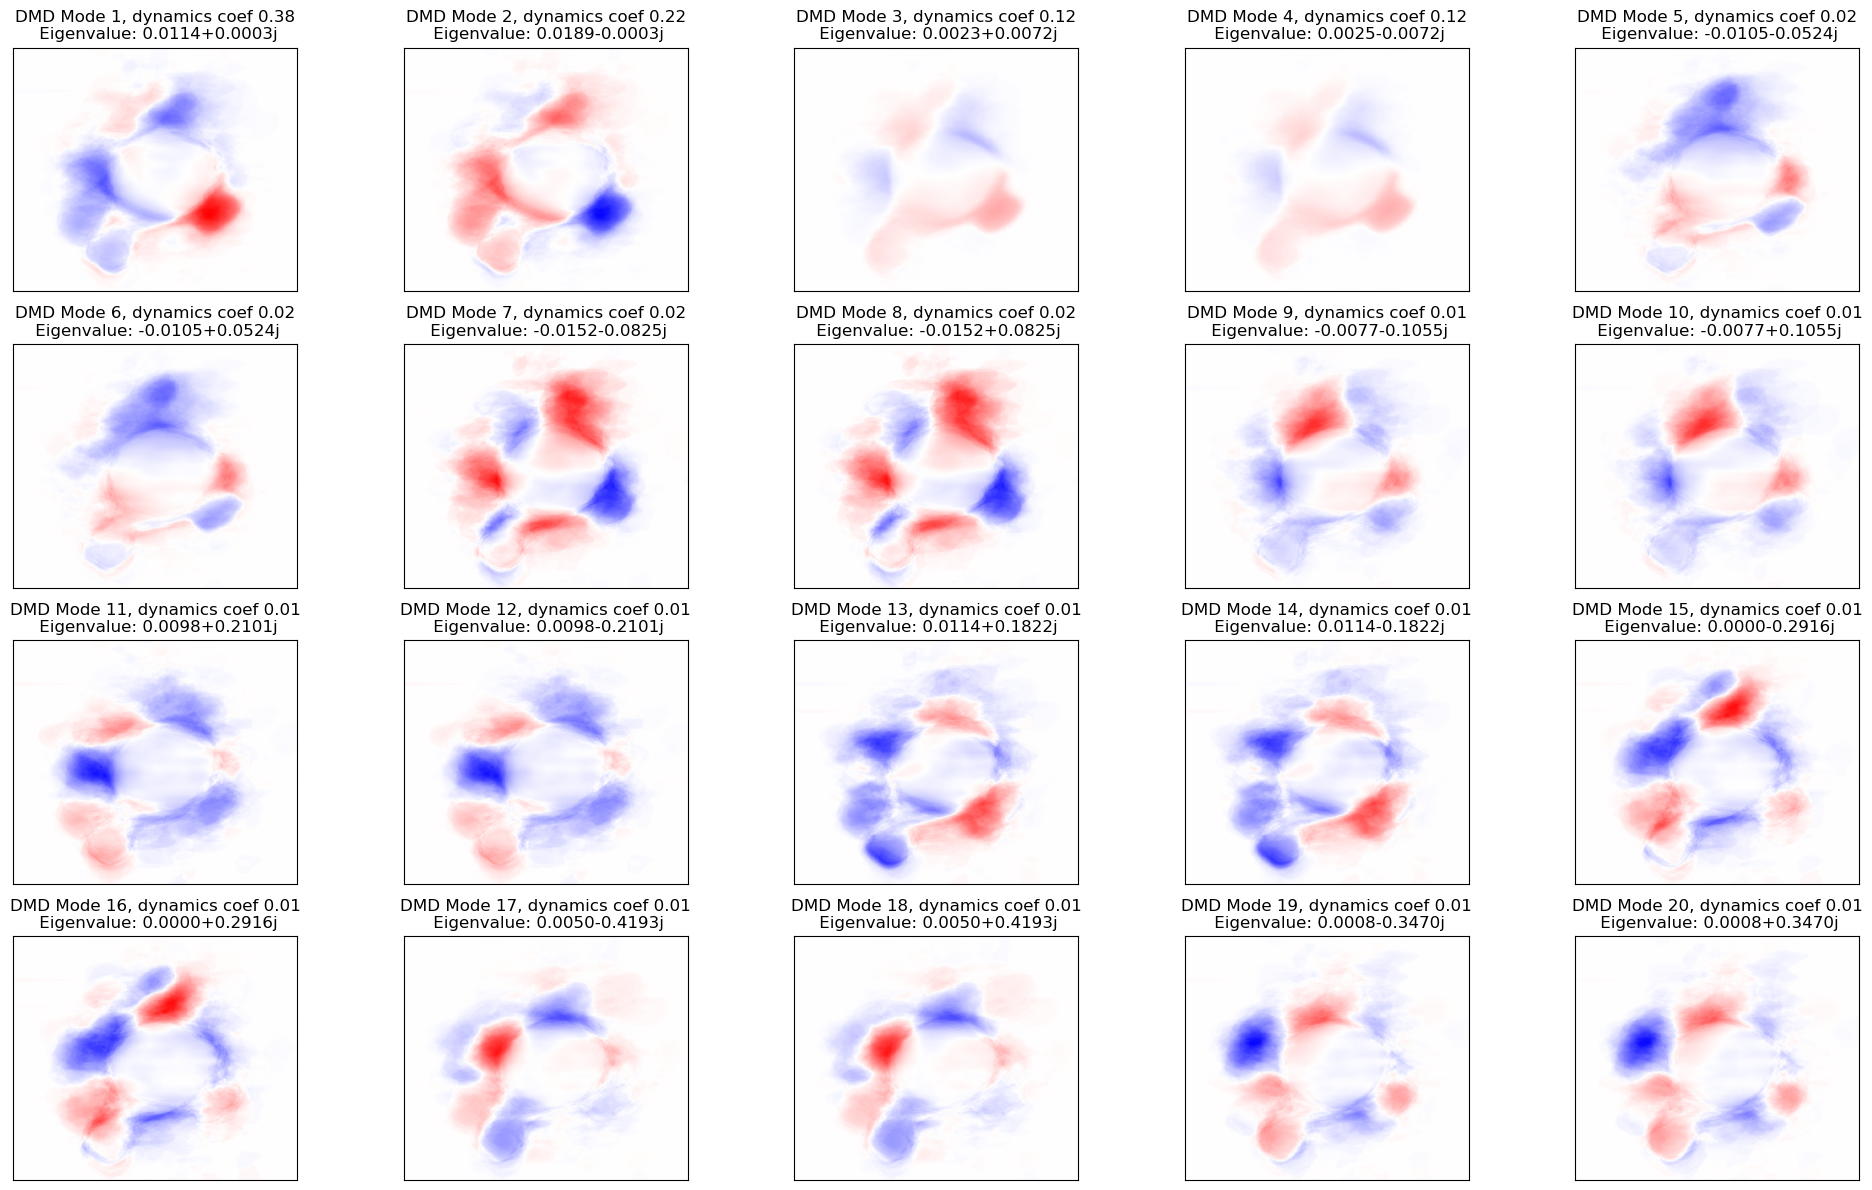

In [8]:
#Select higher amplitude dmd modes  
r_modes = 20
dmd_dynamics_l2 = np.linalg.norm(optdmd.dynamics, axis=1)
max_dynamics_indices = np.argsort(dmd_dynamics_l2)[-r_modes:][::-1]
top_indices = max_dynamics_indices[:r_modes]  # Indices of the top 5 modes
#Plot modes and amplitude evolution in the same figure
fig, axes = plt.subplots(4, 5, figsize=(20, 12))  # 2 rows, 5 columns
for i, idx in enumerate(top_indices):
    mode_shape = optdmd.modes[:, idx].reshape(frames.shape[1], frames.shape[2])
    max_val = np.max(np.abs(mode_shape))
    # amplitude_evolution = optdmd.amplitudes[idx] * np.exp(optdmd.eigs[idx] * np.linspace(0, frames.shape[0]-1, frames.shape[0]))
    dynamics = np.linalg.norm(optdmd.dynamics[idx,:]) / np.sum(np.linalg.norm(optdmd.dynamics, axis=1))
    ax = axes[i // 5, i % 5]
    im = ax.imshow(np.real(mode_shape), cmap='bwr', vmin=-max_val, vmax=max_val)
    ax.set_xticks([]); ax.set_yticks([])
    ax.set_title(f"DMD Mode {i+1}, dynamics coef {dynamics:.2f}\n Eigenvalue: {optdmd.eigs[idx]:.4f}")
plt.tight_layout()
plt.savefig('DMD_top_modes_dynamics_full.svg')

In [75]:
# Create a gif using partial optdmd.reconstructed_data with index modes
import imageio
# reconstruct only using top r_modes
r_modes = 20
dmd_dynamics_l2 = np.linalg.norm(optdmd.dynamics, axis=1)
max_dynamics_indices = np.argsort(dmd_dynamics_l2)[-r_modes:][::-1]
idxs = [10,11,12,13,14,15,16,17,18,19]  # Indices of the top modes to include
idxs_plot = [i+1 for i in idxs]
top_indices = np.array([max_dynamics_indices[i] for i in idxs])  # Indices of the reconstructed modes
# Create a mask for the selected modes
mode_mask = np.zeros(optdmd.modes.shape[1], dtype=bool)
mode_mask[top_indices] = True
# Reconstruct data using only the selected modes
partial_reconstruction = optdmd.reconstructed_data.copy()
partial_reconstruction = (optdmd.modes[:, mode_mask] @ (optdmd.dynamics[mode_mask, :])) + X_mean
# Save as gif
with imageio.get_writer( f"DMD_reconstruction_{idxs_plot}.mp4", fps=10, codec="libx264", 
                        macro_block_size=1) as writer:
    for i in range(partial_reconstruction.shape[1]):
        frame = np.real(partial_reconstruction[:, i].reshape(frames.shape[1], frames.shape[2]))
        # Normalize frame for better visualization
        frame_min = np.min(frame)
        frame_max = np.max(frame)
        norm_frame = (frame - frame_min) / (frame_max - frame_min) * 255
        norm_frame = norm_frame.astype(np.uint8)
        writer.append_data(norm_frame)


vmin = partial_reconstruction.min()
vmax = partial_reconstruction.max()
ds = 3     # spatial downsample
step = 3   # temporal downsample
partial_reconstruction = partial_reconstruction.reshape(frames.shape[1], frames.shape[2],frames.shape[0])
with imageio.get_writer(
    f"DMD_reconstruction_{idxs_plot}.gif",
    mode="I",
    duration=0.12,
    palettesize=32
) as writer:
    for i in range(0, partial_reconstruction.shape[2], step):
        frame = np.real(partial_reconstruction[:, :, i])
        frame = frame[::ds, ::ds]
        frame = (frame - vmin) / (vmax - vmin)
        frame = np.clip(frame, 0, 1)
        writer.append_data((255 * frame).astype(np.uint8))

/tmp/ipykernel_29979/2970697959.py:45: ComplexWarning: Casting complex values to real discards the imaginary part
  writer.append_data((255 * frame).astype(np.uint8))


In [6]:
# Create a gif using optdmd.reconstructed_data
import imageio
reconstructed_frames = optdmd.reconstructed_data + X_mean
reconstructed_frames = reconstructed_frames.reshape(frames.shape[1], frames.shape[2],frames.shape[0])

vmin = reconstructed_frames.min()
vmax = reconstructed_frames.max()
ds = 3     # spatial downsample
step = 3   # temporal downsample
with imageio.get_writer(
    f"dmd_reconstruction_preview_r{rank}.gif",
    mode="I",
    duration=0.12,
    palettesize=32
) as writer:
    for i in range(0, reconstructed_frames.shape[2], step):
        frame = np.real(reconstructed_frames[:, :, i])
        frame = frame[::ds, ::ds]
        frame = (frame - vmin) / (vmax - vmin)
        frame = np.clip(frame, 0, 1)
        writer.append_data((255 * frame).astype(np.uint8))

with imageio.get_writer( f"dmd_reconstruction_r{rank}.mp4", fps=10, codec="libx264", 
                        macro_block_size=1) as writer:
    for i in range(reconstructed_frames.shape[2]):
        frame = np.real(reconstructed_frames[:, :, i])
        # normalize (global limits!)
        frame = (frame - vmin) / (vmax - vmin)
        frame = np.clip(frame, 0, 1)
        frame_u8 = (255 * frame).astype(np.uint8)
        writer.append_data(frame_u8)


/tmp/ipykernel_4234/3300802527.py:21: ComplexWarning: Casting complex values to real discards the imaginary part
  writer.append_data((255 * frame).astype(np.uint8))
/tmp/ipykernel_4234/3300802527.py:30: ComplexWarning: Casting complex values to real discards the imaginary part
  frame_u8 = (255 * frame).astype(np.uint8)


In [7]:
def get_positions_from_frames(frames):
    """
    The positions (X,Y) are obtained and stores in a array for each frame, 
    asumming the intensities of the images as distributions of the positions coordinates
    """
    positions_per_frame = []
    for frame in frames:
        max_val = np.max(frame)
        y, x = np.where(frame > 0.1 * max_val)  
        positions = np.vstack([x, y]).T  
        positions_per_frame.append(positions)
    return positions_per_frame
# Function to calculate the mass centroid
def calculate_center_of_mass(positions):
    return np.mean(positions, axis=0)

# Función to calcualte RyG
def calculate_radius_of_gyration(positions):
    com = calculate_center_of_mass(positions)
    squared_distances = np.sum((positions - com) ** 2, axis=1)  
    rg = np.sqrt(np.mean(squared_distances))  
    return rg

# Extract DMD and experimental coordinates
frame_mean = X_mean.T.reshape(1,frames.shape[1],frames.shape[2])
original_positions = get_positions_from_frames(X.T.reshape(frames.shape))
dmd_positions = get_positions_from_frames(frame_mean + optdmd.reconstructed_data.T.reshape(frames.shape))

# Calculate RyG
rgyr_original = [calculate_radius_of_gyration(positions) for positions in original_positions]
rgyr_dmd = [calculate_radius_of_gyration(positions) for positions in dmd_positions]


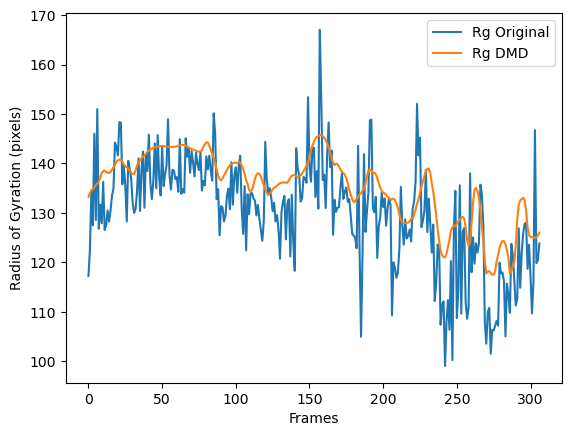

In [8]:
plt.plot(rgyr_original, label="Rg Original")
plt.plot(rgyr_dmd, label="Rg DMD")
plt.xlabel('Frames')
plt.ylabel('Radius of Gyration (pixels)')
plt.legend()
plt.savefig(f'rg_video5_rank{rank}.svg')

In [9]:
# Calculate RMSD for AFM y DMD using the first frame as reference
def calculate_rmsd(positions_ref, positions_target):
    diff = positions_ref - positions_target
    rmsd = np.sqrt(np.mean(np.sum(diff ** 2, axis=1)))
    return rmsd

def compute_rmsd_series(frames, reference_frame):
    rmsd_series = []
    for i in range(len(frames)):
        max_val = np.max(frames[i])
        max_val_ref = np.max(reference_frame)
        positions_ref = np.column_stack(np.where(reference_frame >  0.1 * max_val_ref))  
        positions_target = np.column_stack(np.where(frames[i] >  0.1 * max_val))     
        min_size = min(len(positions_ref), len(positions_target))
        positions_ref, positions_target = positions_ref[:min_size], positions_target[:min_size]
        rmsd = calculate_rmsd(positions_ref, positions_target)
        rmsd_series.append(rmsd)
    return rmsd_series


reference_afm = frames[0]
reference_dmd = frame_mean[0] + optdmd.reconstructed_data.T.reshape(frames.shape)[0]

rmsd_afm = compute_rmsd_series(frames, reference_afm)
rmsd_dmd = compute_rmsd_series(
    frame_mean + optdmd.reconstructed_data.T.reshape(frames.shape[0], frames.shape[1], frames.shape[2]),
    reference_dmd
)

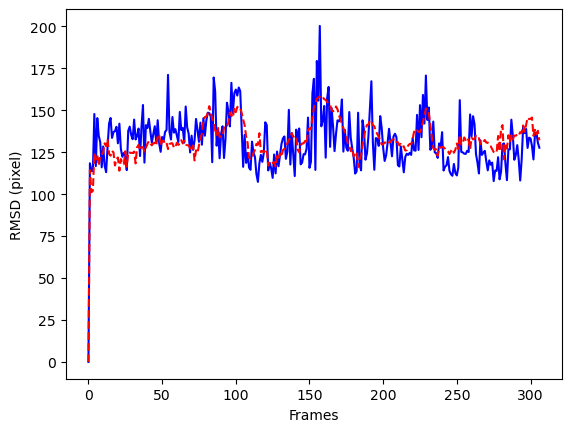

In [10]:
plt.plot(rmsd_afm, label="RMSD AFM", color="blue"); 
plt.plot(rmsd_dmd, label="RMSD DMD", color="red", linestyle="--")
plt.xlabel("Frames"); plt.ylabel("RMSD (pixel)")
plt.savefig(f'rmsd_video5_rank{rank}.svg')